In [6]:
import numpy as np
from bposd.hgp import hgp
from bposd.css_decode_sim import css_decode_sim
from bposd.css import css_code


In [10]:
pip install galois


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 3.8 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [galois]2m2/3 [galois]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys, subprocess
print(subprocess.check_output([sys.executable, "-m", "pip", "show", "bposd"]).decode())


Name: bposd
Version: 2.1
Summary: BP+OSD
Home-page: https://roffe.eu/software/ldpc
Author: Joschka Roffe
Author-email: 
License: 
Location: /Users/louisliu/miniconda3/envs/qisenv/lib/python3.13/site-packages
Editable project location: /Users/louisliu/Desktop/New folder/research/Notes for QEC/5|-||-| QEC notes/bp_osd-main 3
Requires: ldpc, numpy, scipy
Required-by: 



## [[882,24,d]] GHP code l =63

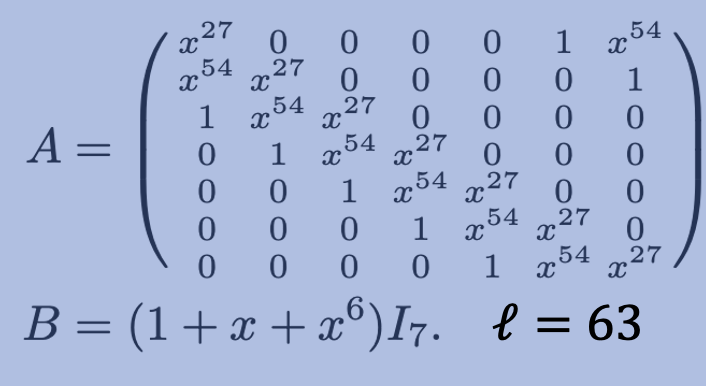

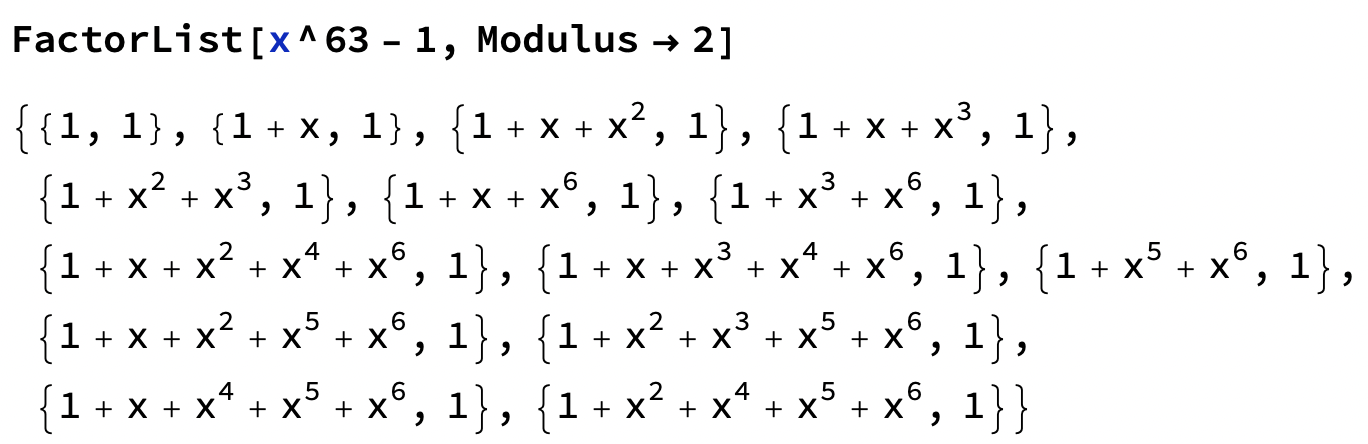

In [13]:
from IPython.display import Image, display 
display(Image(filename=r"/Users/louisliu/Desktop/New folder/research/Notes for QEC/5|-||-| QEC notes/bp_osd-main 3/GHP code 1.png", width=600 ))
display(Image(filename=r"/Users/louisliu/Desktop/New folder/research/Notes for QEC/5|-||-| QEC notes/bp_osd-main 3/factor GHP code .png", width=600 ))


In [7]:
import numpy as np

def P_power(l, k):
    I = np.eye(l, dtype=np.uint8)
    return np.roll(I, -k % l, axis=1)

A = (np.kron(P_power(7, 2), P_power(63, 0)) ^
    np.kron(P_power(7, 1), P_power(63, 54)) ^
    np.kron(P_power(7, 0), P_power(63, 27)))

B = np.kron(P_power(7, 0),
            (P_power(63, 0) ^ P_power(63, 1) ^ P_power(63, 6)))

hx = np.hstack((A, B)).astype(np.uint8)
hz = np.hstack((B.T, A.T)).astype(np.uint8)

qcodeGHP= css_code(hx, hz)
qcodeGHP.test()



<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


True

## [[1922, 50, 16]] HGP code l =31

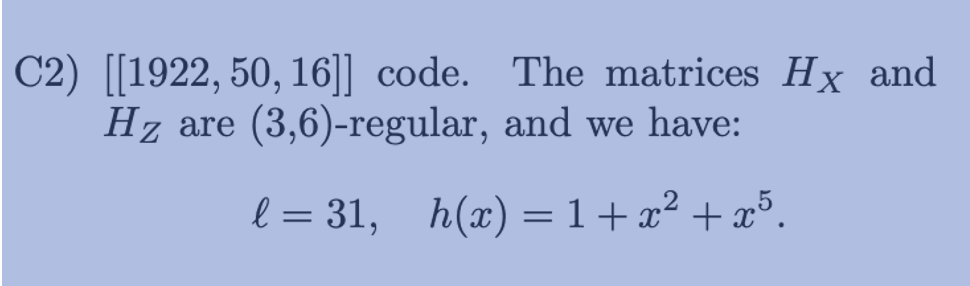

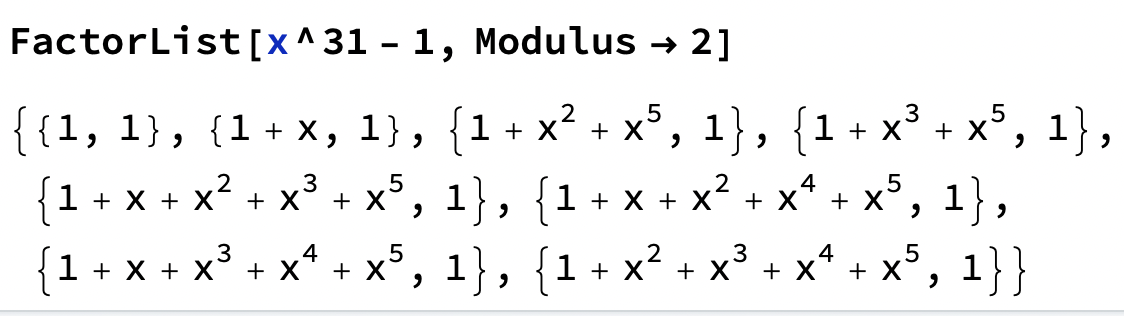

In [15]:
from IPython.display import Image, display 
display(Image(filename=r"/Users/louisliu/Desktop/New folder/research/Notes for QEC/5|-||-| QEC notes/bp_osd-main 3/HGP code 1.png", width=600 ))
display(Image(filename=r"/Users/louisliu/Desktop/New folder/research/Notes for QEC/5|-||-| QEC notes/bp_osd-main 3/factor HGP code.png", width=600 ))

In [8]:
import numpy as np

def P_power(l, k):
    I = np.eye(l, dtype=np.uint8)
    return np.roll(I, -k % l, axis=1)

A = np.kron((P_power(31, 0) ^ P_power(31, 2) ^ P_power(31, 5)), P_power(31, 0))

B = np.kron(P_power(31, 0),
            (P_power(31, 0) ^ P_power(31, 2) ^ P_power(31, 5)))

hx = np.hstack((A, B)).astype(np.uint8)
hz = np.hstack((B.T, A.T)).astype(np.uint8)

qcodeHGP = css_code(hx, hz)
qcodeHGP.test()

<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


True

## BP decoder for [[882,24,d]] GHP code and [[1922, 50, 16]] HGP code 

In [5]:
from ldpc import BpDecoder
import numpy as np

## Iteration 3

RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 1; BP: 5.96±0.15%; Success: 23511/25000; NonConv: 1489/25000; SyndFail: 0/25000; LogErr: 0/25000; TotalLogErr: 1369/25000; Conv_X: 24104/25000; Conv_Z: 24198/25000; Synd_OK: 23511/25000: 100% 25000/25000 [02:53<00:00, 143.99it/s]



FINAL: d_max: 1; BP: 5.96±0.15%; Success: 23511/25000; NonConv: 1489/25000; SyndFail: 0/25000; LogErr: 0/25000; TotalLogErr: 1369/25000; Conv_X: 24104/25000; Conv_Z: 24198/25000; Synd_OK: 23511/25000
GHP p=1.00e-01 K=24 target_runs=25000 BP LER(Block)=5.956e-02 BP WER(Per-logical)=2.555e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 1; BP: 1.28±0.065%; Success: 29671/30056; NonConv: 385/30056; SyndFail: 0/30056; LogErr: 0/30056; TotalLogErr: 330/30056; Conv_X: 29866/30056; Conv_Z: 29847/30056; Synd_OK: 29671/30056: 100% 30056/30056 [03:09<00:00, 158.90it/s]



FINAL: d_max: 1; BP: 1.28±0.065%; Success: 29671/30056; NonConv: 385/30056; SyndFail: 0/30056; LogErr: 0/30056; TotalLogErr: 330/30056; Conv_X: 29866/30056; Conv_Z: 29847/30056; Synd_OK: 29671/30056
GHP p=8.32e-02 K=24 target_runs=30056 BP LER(Block)=1.281e-02 BP WER(Per-logical)=5.370e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.446±0.035%; Success: 35974/36135; NonConv: 161/36135; SyndFail: 0/36135; LogErr: 0/36135; TotalLogErr: 129/36135; Conv_X: 36050/36135; Conv_Z: 36058/36135; Synd_OK: 35974/36135: 100% 36135/36135 [03:44<00:00, 161.09it/s]



FINAL: d_max: 2; BP: 0.446±0.035%; Success: 35974/36135; NonConv: 161/36135; SyndFail: 0/36135; LogErr: 0/36135; TotalLogErr: 129/36135; Conv_X: 36050/36135; Conv_Z: 36058/36135; Synd_OK: 35974/36135
GHP p=6.92e-02 K=24 target_runs=36135 BP LER(Block)=4.456e-03 BP WER(Per-logical)=1.860e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.189±0.021%; Success: 43363/43445; NonConv: 82/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 62/43445; Conv_X: 43402/43445; Conv_Z: 43406/43445; Synd_OK: 43363/43445: 100% 43445/43445 [03:45<00:00, 192.73it/s]



FINAL: d_max: 2; BP: 0.189±0.021%; Success: 43363/43445; NonConv: 82/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 62/43445; Conv_X: 43402/43445; Conv_Z: 43406/43445; Synd_OK: 43363/43445
GHP p=5.75e-02 K=24 target_runs=43445 BP LER(Block)=1.887e-03 BP WER(Per-logical)=7.871e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.109±0.014%; Success: 52175/52232; NonConv: 57/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 42/52232; Conv_X: 52204/52232; Conv_Z: 52203/52232; Synd_OK: 52175/52232: 100% 52232/52232 [04:28<00:00, 194.61it/s]



FINAL: d_max: 2; BP: 0.109±0.014%; Success: 52175/52232; NonConv: 57/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 42/52232; Conv_X: 52204/52232; Conv_Z: 52203/52232; Synd_OK: 52175/52232
GHP p=4.79e-02 K=24 target_runs=52232 BP LER(Block)=1.091e-03 BP WER(Per-logical)=4.549e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0844±0.012%; Success: 62744/62797; NonConv: 53/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 35/62797; Conv_X: 62771/62797; Conv_Z: 62770/62797; Synd_OK: 62744/62797: 100% 62797/62797 [05:18<00:00, 197.45it/s]



FINAL: d_max: 2; BP: 0.0844±0.012%; Success: 62744/62797; NonConv: 53/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 35/62797; Conv_X: 62771/62797; Conv_Z: 62770/62797; Synd_OK: 62744/62797
GHP p=3.98e-02 K=24 target_runs=62797 BP LER(Block)=8.440e-04 BP WER(Per-logical)=3.518e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0556±0.0086%; Success: 75456/75498; NonConv: 42/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 24/75498; Conv_X: 75476/75498; Conv_Z: 75478/75498; Synd_OK: 75456/75498: 100% 75498/75498 [06:19<00:00, 198.95it/s]



FINAL: d_max: 2; BP: 0.0556±0.0086%; Success: 75456/75498; NonConv: 42/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 24/75498; Conv_X: 75476/75498; Conv_Z: 75478/75498; Synd_OK: 75456/75498
GHP p=3.31e-02 K=24 target_runs=75498 BP LER(Block)=5.563e-04 BP WER(Per-logical)=2.319e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0308±0.0058%; Success: 90741/90769; NonConv: 28/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 21/90769; Conv_X: 90755/90769; Conv_Z: 90755/90769; Synd_OK: 90741/90769: 100% 90769/90769 [07:33<00:00, 200.28it/s]



FINAL: d_max: 2; BP: 0.0308±0.0058%; Success: 90741/90769; NonConv: 28/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 21/90769; Conv_X: 90755/90769; Conv_Z: 90755/90769; Synd_OK: 90741/90769
GHP p=2.75e-02 K=24 target_runs=90769 BP LER(Block)=3.085e-04 BP WER(Per-logical)=1.286e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 3; BP: 0.0119±0.0033%; Success: 109115/109128; NonConv: 13/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 5/109128; Conv_X: 109123/109128; Conv_Z: 109120/109128; Synd_OK: 109115/109128: 100% 109128/109128 [09:25<00:00, 192.94it/s]



FINAL: d_max: 3; BP: 0.0119±0.0033%; Success: 109115/109128; NonConv: 13/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 5/109128; Conv_X: 109123/109128; Conv_Z: 109120/109128; Synd_OK: 109115/109128
GHP p=2.29e-02 K=24 target_runs=109128 BP LER(Block)=1.191e-04 BP WER(Per-logical)=4.964e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0107±0.0029%; Success: 131187/131201; NonConv: 10/131201; SyndFail: 4/131201; LogErr: 0/131201; TotalLogErr: 7/131201; Conv_X: 131194/131201; Conv_Z: 131198/131201; Synd_OK: 131187/131201: 100% 131201/131201 [12:02<00:00, 181.53it/s]



FINAL: d_max: 2; BP: 0.0107±0.0029%; Success: 131187/131201; NonConv: 10/131201; SyndFail: 4/131201; LogErr: 0/131201; TotalLogErr: 7/131201; Conv_X: 131194/131201; Conv_Z: 131198/131201; Synd_OK: 131187/131201
GHP p=1.91e-02 K=24 target_runs=131201 BP LER(Block)=1.067e-04 BP WER(Per-logical)=4.446e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0228±0.0038%; Success: 157703/157739; NonConv: 7/157739; SyndFail: 29/157739; LogErr: 0/157739; TotalLogErr: 34/157739; Conv_X: 157736/157739; Conv_Z: 157735/157739; Synd_OK: 157703/157739: 100% 157739/157739 [14:01<00:00, 187.35it/s]



FINAL: d_max: 2; BP: 0.0228±0.0038%; Success: 157703/157739; NonConv: 7/157739; SyndFail: 29/157739; LogErr: 0/157739; TotalLogErr: 34/157739; Conv_X: 157736/157739; Conv_Z: 157735/157739; Synd_OK: 157703/157739
GHP p=1.58e-02 K=24 target_runs=157739 BP LER(Block)=2.282e-04 BP WER(Per-logical)=9.510e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 10.3±0.19%; Success: 22432/25000; NonConv: 2561/25000; SyndFail: 0/25000; LogErr: 7/25000; TotalLogErr: 1427/25000; Conv_X: 23592/25000; Conv_Z: 23653/25000; Synd_OK: 22439/25000: 100% 25000/25000 [05:44<00:00, 72.65it/s]



FINAL: d_max: 2; BP: 10.3±0.19%; Success: 22432/25000; NonConv: 2561/25000; SyndFail: 0/25000; LogErr: 7/25000; TotalLogErr: 1427/25000; Conv_X: 23592/25000; Conv_Z: 23653/25000; Synd_OK: 22439/25000
HGP p=1.00e-01 K=50 target_runs=25000 BP LER(Block)=1.027e-01 BP WER(Per-logical)=2.165e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 2.7±0.094%; Success: 29244/30056; NonConv: 811/30056; SyndFail: 0/30056; LogErr: 1/30056; TotalLogErr: 391/30056; Conv_X: 29659/30056; Conv_Z: 29632/30056; Synd_OK: 29245/30056: 100% 30056/30056 [05:47<00:00, 86.41it/s] 



FINAL: d_max: 2; BP: 2.7±0.094%; Success: 29244/30056; NonConv: 811/30056; SyndFail: 0/30056; LogErr: 1/30056; TotalLogErr: 391/30056; Conv_X: 29659/30056; Conv_Z: 29632/30056; Synd_OK: 29245/30056
HGP p=8.32e-02 K=50 target_runs=30056 BP LER(Block)=2.702e-02 BP WER(Per-logical)=5.476e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.955±0.051%; Success: 35790/36135; NonConv: 344/36135; SyndFail: 0/36135; LogErr: 1/36135; TotalLogErr: 157/36135; Conv_X: 35974/36135; Conv_Z: 35949/36135; Synd_OK: 35791/36135: 100% 36135/36135 [06:45<00:00, 89.17it/s] 



FINAL: d_max: 2; BP: 0.955±0.051%; Success: 35790/36135; NonConv: 344/36135; SyndFail: 0/36135; LogErr: 1/36135; TotalLogErr: 157/36135; Conv_X: 35974/36135; Conv_Z: 35949/36135; Synd_OK: 35791/36135
HGP p=6.92e-02 K=50 target_runs=36135 BP LER(Block)=9.548e-03 BP WER(Per-logical)=1.918e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.433±0.031%; Success: 43257/43445; NonConv: 188/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 73/43445; Conv_X: 43359/43445; Conv_Z: 43342/43445; Synd_OK: 43257/43445: 100% 43445/43445 [07:55<00:00, 91.30it/s] 



FINAL: d_max: 2; BP: 0.433±0.031%; Success: 43257/43445; NonConv: 188/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 73/43445; Conv_X: 43359/43445; Conv_Z: 43342/43445; Synd_OK: 43257/43445
HGP p=5.75e-02 K=50 target_runs=43445 BP LER(Block)=4.327e-03 BP WER(Per-logical)=8.673e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.258±0.022%; Success: 52097/52232; NonConv: 135/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 58/52232; Conv_X: 52170/52232; Conv_Z: 52159/52232; Synd_OK: 52097/52232: 100% 52232/52232 [09:12<00:00, 94.58it/s] 



FINAL: d_max: 2; BP: 0.258±0.022%; Success: 52097/52232; NonConv: 135/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 58/52232; Conv_X: 52170/52232; Conv_Z: 52159/52232; Synd_OK: 52097/52232
HGP p=4.79e-02 K=50 target_runs=52232 BP LER(Block)=2.585e-03 BP WER(Per-logical)=5.176e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 1; BP: 0.175±0.017%; Success: 62687/62797; NonConv: 110/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 33/62797; Conv_X: 62739/62797; Conv_Z: 62745/62797; Synd_OK: 62687/62797: 100% 62797/62797 [10:51<00:00, 96.45it/s] 



FINAL: d_max: 1; BP: 0.175±0.017%; Success: 62687/62797; NonConv: 110/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 33/62797; Conv_X: 62739/62797; Conv_Z: 62745/62797; Synd_OK: 62687/62797
HGP p=3.98e-02 K=50 target_runs=62797 BP LER(Block)=1.752e-03 BP WER(Per-logical)=3.506e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.098±0.011%; Success: 75424/75498; NonConv: 74/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 33/75498; Conv_X: 75456/75498; Conv_Z: 75466/75498; Synd_OK: 75424/75498: 100% 75498/75498 [12:46<00:00, 98.46it/s]  



FINAL: d_max: 2; BP: 0.098±0.011%; Success: 75424/75498; NonConv: 74/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 33/75498; Conv_X: 75456/75498; Conv_Z: 75466/75498; Synd_OK: 75424/75498
HGP p=3.31e-02 K=50 target_runs=75498 BP LER(Block)=9.802e-04 BP WER(Per-logical)=1.961e-05
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0375±0.0064%; Success: 90735/90769; NonConv: 34/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 13/90769; Conv_X: 90751/90769; Conv_Z: 90753/90769; Synd_OK: 90735/90769: 100% 90769/90769 [15:21<00:00, 98.55it/s] 



FINAL: d_max: 2; BP: 0.0375±0.0064%; Success: 90735/90769; NonConv: 34/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 13/90769; Conv_X: 90751/90769; Conv_Z: 90753/90769; Synd_OK: 90735/90769
HGP p=2.75e-02 K=50 target_runs=90769 BP LER(Block)=3.746e-04 BP WER(Per-logical)=7.493e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0275±0.005%; Success: 109098/109128; NonConv: 30/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 10/109128; Conv_X: 109112/109128; Conv_Z: 109114/109128; Synd_OK: 109098/109128: 100% 109128/109128 [18:22<00:00, 99.00it/s]  



FINAL: d_max: 2; BP: 0.0275±0.005%; Success: 109098/109128; NonConv: 30/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 10/109128; Conv_X: 109112/109128; Conv_Z: 109114/109128; Synd_OK: 109098/109128
HGP p=2.29e-02 K=50 target_runs=109128 BP LER(Block)=2.749e-04 BP WER(Per-logical)=5.499e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0168±0.0036%; Success: 131179/131201; NonConv: 22/131201; SyndFail: 0/131201; LogErr: 0/131201; TotalLogErr: 10/131201; Conv_X: 131188/131201; Conv_Z: 131192/131201; Synd_OK: 131179/131201: 100% 131201/131201 [21:59<00:00, 99.44it/s] 



FINAL: d_max: 2; BP: 0.0168±0.0036%; Success: 131179/131201; NonConv: 22/131201; SyndFail: 0/131201; LogErr: 0/131201; TotalLogErr: 10/131201; Conv_X: 131188/131201; Conv_Z: 131192/131201; Synd_OK: 131179/131201
HGP p=1.91e-02 K=50 target_runs=131201 BP LER(Block)=1.677e-04 BP WER(Per-logical)=3.354e-06
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.00571±0.0019%; Success: 157730/157739; NonConv: 9/157739; SyndFail: 0/157739; LogErr: 0/157739; TotalLogErr: 4/157739; Conv_X: 157734/157739; Conv_Z: 157735/157739; Synd_OK: 157730/157739: 100% 157739/157739 [26:13<00:00, 100.28it/s]



FINAL: d_max: 2; BP: 0.00571±0.0019%; Success: 157730/157739; NonConv: 9/157739; SyndFail: 0/157739; LogErr: 0/157739; TotalLogErr: 4/157739; Conv_X: 157734/157739; Conv_Z: 157735/157739; Synd_OK: 157730/157739
HGP p=1.58e-02 K=50 target_runs=157739 BP LER(Block)=5.706e-05 BP WER(Per-logical)=1.141e-06


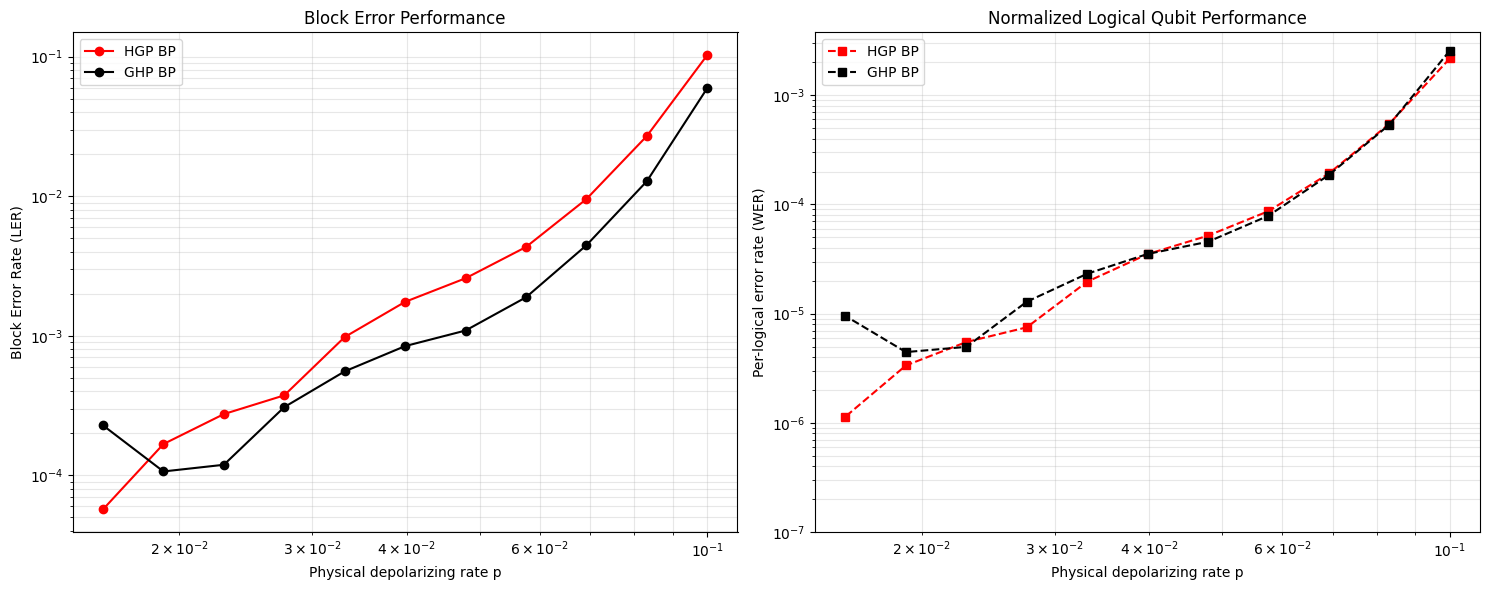

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json
# --- SETTINGS ---
run_osd = False
# Extended range to see the plateau (error floor) for HGP
ps = [10 ** (-x) for x in np.linspace(1.0, 1.8, 11)]
def target_runs_for_p(p, base=2500):
    """
    Set target_runs proportional to 1/p.
    Example: p = 1e-2 -> target_runs = 100,000
    """
    return int(base / p)
def run_one(code, p, decoder_type="bp"):
    tr = target_runs_for_p(p)
    sim = css_decode_sim(
        hx=code.hx, hz=code.hz,
        error_rate=p, xyz_error_bias=[1, 1, 1],
        target_runs=tr,
        bp_method="minimum_sum",
        ms_scaling_factor=0.625,
        max_iter=32,
        channel_update= "alternate",
        seed=42,
        decoder_type=decoder_type,
        osd_method="osd_cs",
        osd_order=10,
        tqdm_disable=0,
        outer_iters=3,
        bp_success_criterion="WER_bp",
        output_file=None
    )
    if decoder_type == "bp":
        # bp_logical_error_rate = Block Error Rate
        # bp_word_error_rate = Per-logical Rate
        return sim.bp_logical_error_rate, sim.bp_word_error_rate, sim.K
    else:
        return sim.osdw_logical_error_rate, sim.osdw_word_error_rate, sim.K
results = {}
for name, code in [("GHP", qcodeGHP), ("HGP", qcodeHGP)]:
    results[name] = {
        "p": [],
        "bp_LER": [],
        "bp_WER": [],
        "osd_LER": [],
        "osd_WER": []
    }
    for p in ps:
        bp_LER, bp_WER, K = run_one(code, p, "bp")
        print(
            f"{name} p={p:.2e} K={K} "
            f"target_runs={target_runs_for_p(p)} "
            f"BP LER(Block)={bp_LER:.3e} "
            f"BP WER(Per-logical)={bp_WER:.3e}"
        )
        results[name]["p"].append(p)
        results[name]["bp_LER"].append(bp_LER)
        results[name]["bp_WER"].append(bp_WER)
        if run_osd:
            osd_LER, osd_WER, _ = run_one(code, p, "bp_osd")
            results[name]["osd_LER"].append(osd_LER)
            results[name]["osd_WER"].append(osd_WER)
# --- PLOTTING ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Graph 1: Block Logical Error Rate (LER)
for name, color in [("HGP", "red"), ("GHP", "black")]:
    ax1.plot(
        results[name]["p"],
        results[name]["bp_LER"],
        "o-",
        label=f"{name} BP",
        color=color
    )
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Physical depolarizing rate p")
ax1.set_ylabel("Block Error Rate (LER)")
ax1.set_title("Block Error Performance")
ax1.grid(True, which="both", alpha=0.3)
ax1.legend()
# Graph 2: Per-logical Qubit Error Rate (WER)
for name, color in [("HGP", "red"), ("GHP", "black")]:
    ax2.plot(
        results[name]["p"],
        results[name]["bp_WER"],
        "s--",
        label=f"{name} BP",
        color=color
    )
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(bottom=1e-7)
ax2.set_xlabel("Physical depolarizing rate p")
ax2.set_ylabel("Per-logical error rate (WER)")
ax2.set_title("Normalized Logical Qubit Performance")
ax2.grid(True, which="both", alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig("hgp_vs_ghp_comparison.png", dpi=300)
plt.show()
with open("results.json", "w") as f:
    json.dump(results, f, indent=2)

## BP-OSD and BP decoder for [[882,24,d]] GHP code and [[1922, 50, 16]] HGP code 

## Iteration 3

RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 1; BP: 5.96±0.15%; Success: 23511/25000; NonConv: 1489/25000; SyndFail: 0/25000; LogErr: 0/25000; TotalLogErr: 1369/25000; Conv_X: 24104/25000; Conv_Z: 24198/25000; Synd_OK: 23511/25000: 100% 25000/25000 [02:33<00:00, 162.78it/s]



FINAL: d_max: 1; BP: 5.96±0.15%; Success: 23511/25000; NonConv: 1489/25000; SyndFail: 0/25000; LogErr: 0/25000; TotalLogErr: 1369/25000; Conv_X: 24104/25000; Conv_Z: 24198/25000; Synd_OK: 23511/25000
GHP p=1.00e-01 K=24 target_runs=25000 BP LER(Block)=5.956e-02
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 1; BP: 1.28±0.065%; Success: 29671/30056; NonConv: 385/30056; SyndFail: 0/30056; LogErr: 0/30056; TotalLogErr: 330/30056; Conv_X: 29866/30056; Conv_Z: 29847/30056; Synd_OK: 29671/30056: 100% 30056/30056 [02:47<00:00, 179.95it/s]



FINAL: d_max: 1; BP: 1.28±0.065%; Success: 29671/30056; NonConv: 385/30056; SyndFail: 0/30056; LogErr: 0/30056; TotalLogErr: 330/30056; Conv_X: 29866/30056; Conv_Z: 29847/30056; Synd_OK: 29671/30056
GHP p=8.32e-02 K=24 target_runs=30056 BP LER(Block)=1.281e-02
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.446±0.035%; Success: 35974/36135; NonConv: 161/36135; SyndFail: 0/36135; LogErr: 0/36135; TotalLogErr: 129/36135; Conv_X: 36050/36135; Conv_Z: 36058/36135; Synd_OK: 35974/36135: 100% 36135/36135 [1:29:52<00:00,  6.70it/s]  



FINAL: d_max: 2; BP: 0.446±0.035%; Success: 35974/36135; NonConv: 161/36135; SyndFail: 0/36135; LogErr: 0/36135; TotalLogErr: 129/36135; Conv_X: 36050/36135; Conv_Z: 36058/36135; Synd_OK: 35974/36135
GHP p=6.92e-02 K=24 target_runs=36135 BP LER(Block)=4.456e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.189±0.021%; Success: 43363/43445; NonConv: 82/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 62/43445; Conv_X: 43402/43445; Conv_Z: 43406/43445; Synd_OK: 43363/43445: 100% 43445/43445 [03:37<00:00, 199.49it/s]



FINAL: d_max: 2; BP: 0.189±0.021%; Success: 43363/43445; NonConv: 82/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 62/43445; Conv_X: 43402/43445; Conv_Z: 43406/43445; Synd_OK: 43363/43445
GHP p=5.75e-02 K=24 target_runs=43445 BP LER(Block)=1.887e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.109±0.014%; Success: 52175/52232; NonConv: 57/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 42/52232; Conv_X: 52204/52232; Conv_Z: 52203/52232; Synd_OK: 52175/52232: 100% 52232/52232 [04:21<00:00, 199.81it/s]



FINAL: d_max: 2; BP: 0.109±0.014%; Success: 52175/52232; NonConv: 57/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 42/52232; Conv_X: 52204/52232; Conv_Z: 52203/52232; Synd_OK: 52175/52232
GHP p=4.79e-02 K=24 target_runs=52232 BP LER(Block)=1.091e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0844±0.012%; Success: 62744/62797; NonConv: 53/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 35/62797; Conv_X: 62771/62797; Conv_Z: 62770/62797; Synd_OK: 62744/62797: 100% 62797/62797 [05:10<00:00, 202.26it/s]



FINAL: d_max: 2; BP: 0.0844±0.012%; Success: 62744/62797; NonConv: 53/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 35/62797; Conv_X: 62771/62797; Conv_Z: 62770/62797; Synd_OK: 62744/62797
GHP p=3.98e-02 K=24 target_runs=62797 BP LER(Block)=8.440e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0556±0.0086%; Success: 75456/75498; NonConv: 42/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 24/75498; Conv_X: 75476/75498; Conv_Z: 75478/75498; Synd_OK: 75456/75498: 100% 75498/75498 [06:00<00:00, 209.51it/s]



FINAL: d_max: 2; BP: 0.0556±0.0086%; Success: 75456/75498; NonConv: 42/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 24/75498; Conv_X: 75476/75498; Conv_Z: 75478/75498; Synd_OK: 75456/75498
GHP p=3.31e-02 K=24 target_runs=75498 BP LER(Block)=5.563e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0308±0.0058%; Success: 90741/90769; NonConv: 28/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 21/90769; Conv_X: 90755/90769; Conv_Z: 90755/90769; Synd_OK: 90741/90769: 100% 90769/90769 [07:20<00:00, 205.94it/s]



FINAL: d_max: 2; BP: 0.0308±0.0058%; Success: 90741/90769; NonConv: 28/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 21/90769; Conv_X: 90755/90769; Conv_Z: 90755/90769; Synd_OK: 90741/90769
GHP p=2.75e-02 K=24 target_runs=90769 BP LER(Block)=3.085e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 3; BP: 0.0119±0.0033%; Success: 109115/109128; NonConv: 13/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 5/109128; Conv_X: 109123/109128; Conv_Z: 109120/109128; Synd_OK: 109115/109128: 100% 109128/109128 [08:57<00:00, 202.93it/s]



FINAL: d_max: 3; BP: 0.0119±0.0033%; Success: 109115/109128; NonConv: 13/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 5/109128; Conv_X: 109123/109128; Conv_Z: 109120/109128; Synd_OK: 109115/109128
GHP p=2.29e-02 K=24 target_runs=109128 BP LER(Block)=1.191e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0107±0.0029%; Success: 131187/131201; NonConv: 10/131201; SyndFail: 4/131201; LogErr: 0/131201; TotalLogErr: 7/131201; Conv_X: 131194/131201; Conv_Z: 131198/131201; Synd_OK: 131187/131201: 100% 131201/131201 [11:06<00:00, 196.74it/s]



FINAL: d_max: 2; BP: 0.0107±0.0029%; Success: 131187/131201; NonConv: 10/131201; SyndFail: 4/131201; LogErr: 0/131201; TotalLogErr: 7/131201; Conv_X: 131194/131201; Conv_Z: 131198/131201; Synd_OK: 131187/131201
GHP p=1.91e-02 K=24 target_runs=131201 BP LER(Block)=1.067e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 2; BP: 0.0228±0.0038%; Success: 157703/157739; NonConv: 7/157739; SyndFail: 29/157739; LogErr: 0/157739; TotalLogErr: 34/157739; Conv_X: 157736/157739; Conv_Z: 157735/157739; Synd_OK: 157703/157739: 100% 157739/157739 [1:26:03<00:00, 30.55it/s] 



FINAL: d_max: 2; BP: 0.0228±0.0038%; Success: 157703/157739; NonConv: 7/157739; SyndFail: 29/157739; LogErr: 0/157739; TotalLogErr: 34/157739; Conv_X: 157736/157739; Conv_Z: 157735/157739; Synd_OK: 157703/157739
GHP p=1.58e-02 K=24 target_runs=157739 BP LER(Block)=2.282e-04
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 24; BP: 0.323±0.0015%; OSDW_WER: 6e-07±4.2e-07%; OSDW: 1.44e-05±1e-05%; OSD0: 2.88e-05±1.4e-05%;: 100% 13894954/13894954 [25:57:46<00:00, 148.66it/s]         


GHP p=7.00e-02 K=24 runs=13894954 (10^(0.5/0.07)) OSD-w LER(Block)=1.439e-07
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 32; BP: 0.68±0.0062%; OSDW_WER: 4.69e-06±3.3e-06%; OSDW: 0.000112±8e-05%; OSD0: 0.000506±0.00017%;: 100% 1778279/1778279 [3:35:14<00:00, 137.69it/s]     


GHP p=8.00e-02 K=24 runs=1778279 (10^(0.5/0.08)) OSD-w LER(Block)=1.125e-06
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 28; BP: 1.54±0.021%; OSDW_WER: 0.000139±4e-05%; OSDW: 0.00334±0.00096%; OSD0: 0.00835±0.0015%;: 100% 359381/359381 [46:24<00:00, 129.07it/s]  


GHP p=9.00e-02 K=24 runs=359381 (10^(0.5/0.09)) OSD-w LER(Block)=3.339e-05
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


d_max: 30; BP: 3.71±0.06%; OSDW_WER: 0.00371±0.00039%; OSDW: 0.089±0.0094%; OSD0: 0.152±0.012%;: 100% 100000/100000 [17:37<00:00, 94.59it/s]  


GHP p=1.00e-01 K=24 runs=100000 (10^(0.5/0.10)) OSD-w LER(Block)=8.900e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 10.3±0.19%; Success: 22432/25000; NonConv: 2561/25000; SyndFail: 0/25000; LogErr: 7/25000; TotalLogErr: 1427/25000; Conv_X: 23592/25000; Conv_Z: 23653/25000; Synd_OK: 22439/25000: 100% 25000/25000 [05:31<00:00, 75.40it/s]



FINAL: d_max: 2; BP: 10.3±0.19%; Success: 22432/25000; NonConv: 2561/25000; SyndFail: 0/25000; LogErr: 7/25000; TotalLogErr: 1427/25000; Conv_X: 23592/25000; Conv_Z: 23653/25000; Synd_OK: 22439/25000
HGP p=1.00e-01 K=50 target_runs=25000 BP LER(Block)=1.027e-01
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 2.7±0.094%; Success: 29244/30056; NonConv: 811/30056; SyndFail: 0/30056; LogErr: 1/30056; TotalLogErr: 391/30056; Conv_X: 29659/30056; Conv_Z: 29632/30056; Synd_OK: 29245/30056: 100% 30056/30056 [05:45<00:00, 86.92it/s] 



FINAL: d_max: 2; BP: 2.7±0.094%; Success: 29244/30056; NonConv: 811/30056; SyndFail: 0/30056; LogErr: 1/30056; TotalLogErr: 391/30056; Conv_X: 29659/30056; Conv_Z: 29632/30056; Synd_OK: 29245/30056
HGP p=8.32e-02 K=50 target_runs=30056 BP LER(Block)=2.702e-02
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.955±0.051%; Success: 35790/36135; NonConv: 344/36135; SyndFail: 0/36135; LogErr: 1/36135; TotalLogErr: 157/36135; Conv_X: 35974/36135; Conv_Z: 35949/36135; Synd_OK: 35791/36135: 100% 36135/36135 [06:40<00:00, 90.17it/s]



FINAL: d_max: 2; BP: 0.955±0.051%; Success: 35790/36135; NonConv: 344/36135; SyndFail: 0/36135; LogErr: 1/36135; TotalLogErr: 157/36135; Conv_X: 35974/36135; Conv_Z: 35949/36135; Synd_OK: 35791/36135
HGP p=6.92e-02 K=50 target_runs=36135 BP LER(Block)=9.548e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.433±0.031%; Success: 43257/43445; NonConv: 188/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 73/43445; Conv_X: 43359/43445; Conv_Z: 43342/43445; Synd_OK: 43257/43445: 100% 43445/43445 [07:39<00:00, 94.56it/s] 



FINAL: d_max: 2; BP: 0.433±0.031%; Success: 43257/43445; NonConv: 188/43445; SyndFail: 0/43445; LogErr: 0/43445; TotalLogErr: 73/43445; Conv_X: 43359/43445; Conv_Z: 43342/43445; Synd_OK: 43257/43445
HGP p=5.75e-02 K=50 target_runs=43445 BP LER(Block)=4.327e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.258±0.022%; Success: 52097/52232; NonConv: 135/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 58/52232; Conv_X: 52170/52232; Conv_Z: 52159/52232; Synd_OK: 52097/52232: 100% 52232/52232 [09:01<00:00, 96.50it/s] 



FINAL: d_max: 2; BP: 0.258±0.022%; Success: 52097/52232; NonConv: 135/52232; SyndFail: 0/52232; LogErr: 0/52232; TotalLogErr: 58/52232; Conv_X: 52170/52232; Conv_Z: 52159/52232; Synd_OK: 52097/52232
HGP p=4.79e-02 K=50 target_runs=52232 BP LER(Block)=2.585e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 1; BP: 0.175±0.017%; Success: 62687/62797; NonConv: 110/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 33/62797; Conv_X: 62739/62797; Conv_Z: 62745/62797; Synd_OK: 62687/62797: 100% 62797/62797 [10:47<00:00, 96.99it/s] 



FINAL: d_max: 1; BP: 0.175±0.017%; Success: 62687/62797; NonConv: 110/62797; SyndFail: 0/62797; LogErr: 0/62797; TotalLogErr: 33/62797; Conv_X: 62739/62797; Conv_Z: 62745/62797; Synd_OK: 62687/62797
HGP p=3.98e-02 K=50 target_runs=62797 BP LER(Block)=1.752e-03
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.098±0.011%; Success: 75424/75498; NonConv: 74/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 33/75498; Conv_X: 75456/75498; Conv_Z: 75466/75498; Synd_OK: 75424/75498: 100% 75498/75498 [39:11<00:00, 32.11it/s]    



FINAL: d_max: 2; BP: 0.098±0.011%; Success: 75424/75498; NonConv: 74/75498; SyndFail: 0/75498; LogErr: 0/75498; TotalLogErr: 33/75498; Conv_X: 75456/75498; Conv_Z: 75466/75498; Synd_OK: 75424/75498
HGP p=3.31e-02 K=50 target_runs=75498 BP LER(Block)=9.802e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0375±0.0064%; Success: 90735/90769; NonConv: 34/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 13/90769; Conv_X: 90751/90769; Conv_Z: 90753/90769; Synd_OK: 90735/90769: 100% 90769/90769 [14:25<00:00, 104.90it/s]



FINAL: d_max: 2; BP: 0.0375±0.0064%; Success: 90735/90769; NonConv: 34/90769; SyndFail: 0/90769; LogErr: 0/90769; TotalLogErr: 13/90769; Conv_X: 90751/90769; Conv_Z: 90753/90769; Synd_OK: 90735/90769
HGP p=2.75e-02 K=50 target_runs=90769 BP LER(Block)=3.746e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0275±0.005%; Success: 109098/109128; NonConv: 30/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 10/109128; Conv_X: 109112/109128; Conv_Z: 109114/109128; Synd_OK: 109098/109128: 100% 109128/109128 [17:28<00:00, 104.09it/s] 



FINAL: d_max: 2; BP: 0.0275±0.005%; Success: 109098/109128; NonConv: 30/109128; SyndFail: 0/109128; LogErr: 0/109128; TotalLogErr: 10/109128; Conv_X: 109112/109128; Conv_Z: 109114/109128; Synd_OK: 109098/109128
HGP p=2.29e-02 K=50 target_runs=109128 BP LER(Block)=2.749e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.0168±0.0036%; Success: 131179/131201; NonConv: 22/131201; SyndFail: 0/131201; LogErr: 0/131201; TotalLogErr: 10/131201; Conv_X: 131188/131201; Conv_Z: 131192/131201; Synd_OK: 131179/131201: 100% 131201/131201 [21:26<00:00, 101.99it/s]



FINAL: d_max: 2; BP: 0.0168±0.0036%; Success: 131179/131201; NonConv: 22/131201; SyndFail: 0/131201; LogErr: 0/131201; TotalLogErr: 10/131201; Conv_X: 131188/131201; Conv_Z: 131192/131201; Synd_OK: 131179/131201
HGP p=1.91e-02 K=50 target_runs=131201 BP LER(Block)=1.677e-04
RNG Seed: 42
BP Success Criterion: WER_bp
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 2; BP: 0.00571±0.0019%; Success: 157730/157739; NonConv: 9/157739; SyndFail: 0/157739; LogErr: 0/157739; TotalLogErr: 4/157739; Conv_X: 157734/157739; Conv_Z: 157735/157739; Synd_OK: 157730/157739: 100% 157739/157739 [25:26<00:00, 103.33it/s]



FINAL: d_max: 2; BP: 0.00571±0.0019%; Success: 157730/157739; NonConv: 9/157739; SyndFail: 0/157739; LogErr: 0/157739; TotalLogErr: 4/157739; Conv_X: 157734/157739; Conv_Z: 157735/157739; Synd_OK: 157730/157739
HGP p=1.58e-02 K=50 target_runs=157739 BP LER(Block)=5.706e-05
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 16; BP: 0.382±0.0017%; OSDW_WER: 3.67e-05±2.3e-06%; OSDW: 0.00184±0.00011%; OSD0: 0.00677±0.00022%;: 100% 13894954/13894954 [53:22:45<00:00, 72.31it/s]      


HGP p=7.00e-02 K=50 runs=13894954 (10^(0.5/0.07)) OSD-w LER(Block)=1.835e-05
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 16; BP: 0.814±0.0067%; OSDW_WER: 0.000153±1.3e-05%; OSDW: 0.00765±0.00066%; OSD0: 0.0252±0.0012%;: 100% 1778279/1778279 [7:51:39<00:00, 62.84it/s]  


HGP p=8.00e-02 K=50 runs=1778279 (10^(0.5/0.08)) OSD-w LER(Block)=7.648e-05
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 16; BP: 1.83±0.022%; OSDW_WER: 0.000557±5.6e-05%; OSDW: 0.0278±0.0028%; OSD0: 0.0854±0.0049%;: 100% 359381/359381 [2:14:42<00:00, 44.46it/s]  


HGP p=9.00e-02 K=50 runs=359381 (10^(0.5/0.09)) OSD-w LER(Block)=2.783e-04
RNG Seed: 42
BP Success Criterion: LER
Constructing CSS code from hx and hz matrices...
Checking the CSS code is valid...
<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


d_max: 16; BP: 4.09±0.063%; OSDW_WER: 0.00192±0.0002%; OSDW: 0.096±0.0098%; OSD0: 0.25±0.016%;: 100% 100000/100000 [2:28:41<00:00, 11.21it/s]      


HGP p=1.00e-01 K=50 runs=100000 (10^(0.5/0.10)) OSD-w LER(Block)=9.600e-04


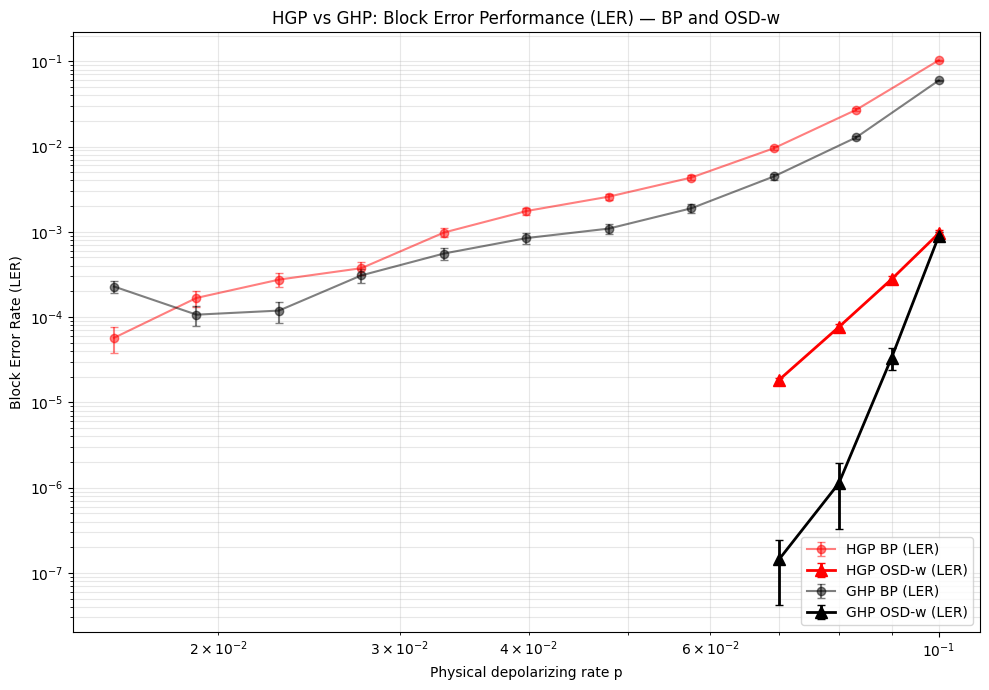

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json

# -------------------------
# BP part: match earlier BP-results driver p-grid
# -------------------------
ps_bp = [10 ** (-x) for x in np.linspace(1.0, 1.8, 11)]

def target_runs_for_p(p, base=2500):
    """Set target_runs proportional to 1/p."""
    return int(base / p)

# -------------------------
# OSD-w part: subset p-grid + expensive run rule
# -------------------------
ps_osd = [x * 10 ** (-2) for x in np.linspace(7, 10, 4)]

def target_runs_osd(p):
    """OSD target runs: 10^(0.5/p)"""
    return int(10 ** (0.5 / p))

def run_one_bp(code, p):
    """BP run."""
    tr = target_runs_for_p(p)
    sim = css_decode_sim(
        hx=code.hx, hz=code.hz,
        error_rate=p, xyz_error_bias=[1, 1, 1],
        target_runs=tr,
        bp_method="minimum_sum",
        ms_scaling_factor=0.625,
        max_iter=32,
        channel_update="alternate",
        seed=42,
        decoder_type="bp",
        tqdm_disable=0,
        outer_iters=3,
        bp_success_criterion="WER_bp",   # keep as your earlier BP script
        output_file=None
    )
    return {
        "K": sim.K,
        # LER = block error rate (per your class' definition under bp_success_criterion)
        "LER": sim.bp_logical_error_rate,
        "LER_eb": sim.bp_logical_error_rate_eb,
        "runs": tr,
    }

def run_one_osdw(code, p):
    """BP+OSD run (use OSD-w results)."""
    tr = target_runs_osd(p)
    sim = css_decode_sim(
        hx=code.hx, hz=code.hz,
        error_rate=p, xyz_error_bias=[1, 1, 1],
        target_runs=tr,
        bp_method="minimum_sum",
        ms_scaling_factor=0.625,
        max_iter=32,
        channel_update="alternate",
        seed=42,
        decoder_type="bp_osd",
        osd_method="osd_cs",
        osd_order=10,
        tqdm_disable=0,
        outer_iters=3,
        bp_success_criterion="LER",   # fine; OSD-w success is logical-only in your class anyway
        output_file=None
    )
    return {
        "K": sim.K,
        "LER": sim.osdw_logical_error_rate,
        "LER_eb": sim.osdw_logical_error_rate_eb,
        "runs": tr,
    }

# -------------------------
# MAIN
# -------------------------
results = {}

for name, code in [("GHP", qcodeGHP), ("HGP", qcodeHGP)]:
    results[name] = {
        # BP (LER)
        "bp_p": [],
        "bp_LER": [],
        "bp_LER_eb": [],
        # OSD-w (LER)
        "osd_p": [],
        "osdw_LER": [],
        "osdw_LER_eb": [],
    }

    # ---- BP sweep ----
    for p in ps_bp:
        res = run_one_bp(code, p)

        results[name]["bp_p"].append(p)
        results[name]["bp_LER"].append(res["LER"])
        results[name]["bp_LER_eb"].append(res["LER_eb"])

        print(
            f"{name} p={p:.2e} K={res['K']} "
            f"target_runs={res['runs']} "
            f"BP LER(Block)={res['LER']:.3e}"
        )

    # ---- OSD-w sweep (subset points) ----
    for p in ps_osd:
        res = run_one_osdw(code, p)

        results[name]["osd_p"].append(p)
        results[name]["osdw_LER"].append(res["LER"])
        results[name]["osdw_LER_eb"].append(res["LER_eb"])

        print(
            f"{name} p={p:.2e} K={res['K']} "
            f"runs={res['runs']} (10^(0.5/{p:.2f})) "
            f"OSD-w LER(Block)={res['LER']:.3e}"
        )

# -------------------------
# PLOTTING: LER only (BP and OSD-w)
# -------------------------
fig, ax = plt.subplots(figsize=(10, 7))

styles = {
    "HGP": {"color": "red"},
    "GHP": {"color": "black"},
}

for name in ["HGP", "GHP"]:
    color = styles[name]["color"]

    # BP LER
    ax.errorbar(
        results[name]["bp_p"],
        results[name]["bp_LER"],
        yerr=results[name]["bp_LER_eb"],
        fmt="o-",
        label=f"{name} BP (LER)",
        color=color,
        capsize=3,
        alpha=0.5
    )

    # OSD-w LER
    ax.errorbar(
        results[name]["osd_p"],
        results[name]["osdw_LER"],
        yerr=results[name]["osdw_LER_eb"],
        fmt="^-",
        label=f"{name} OSD-w (LER)",
        color=color,
        capsize=3,
        alpha=1.0,
        linewidth=2,
        markersize=8
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Physical depolarizing rate p")
ax.set_ylabel("Block Error Rate (LER)")
ax.set_title("HGP vs GHP: Block Error Performance (LER) — BP and OSD-w")
ax.grid(True, which="both", alpha=0.3)
ax.legend(loc="lower right")

plt.tight_layout()
plt.savefig("hgp_vs_ghp_LER_bp_vs_osdw.png", dpi=300)
plt.show()

with open("results_LER_bp_vs_osdw.json", "w") as f:
    json.dump(results, f, indent=2)


In [16]:
import numpy as np
import galois

GF2 = galois.GF(2)
f = galois.Poly.Str("x^6 + x + 1", field=GF2)
GF = galois.GF(2**6, irreducible_poly=f)

a = GF.primitive_element

A = GF([
    [a**27, 0,     0,     0,     0,     1,     a**54],
    [a**54, a**27, 0,     0,     0,     0,     1    ],
    [1,     a**54, a**27, 0,     0,     0,     0    ],
    [0,     1,     a**54, a**27, 0,     0,     0    ],
    [0,     0,     1,     a**54, a**27, 0,     0    ],
    [0,     0,     0,     1,     a**54, a**27, 0    ],
    [0,     0,     0,     0,     1,     a**54, a**27],
])

R = A.row_reduce() 
rank = int(np.sum(np.any(R != 0, axis=1)))
kA = A.shape[0] - rank

print("rank over GF(2^6) =", rank)
print("kernel dimension =", kA)


rank over GF(2^6) = 5
kernel dimension = 2


In [15]:
import numpy as np
import sympy as sp

l = 31

# Right-cyclic permutation matrix X (shift right by 1)
X = np.zeros((l, l), dtype=int)
X[0, l - 1] = 1
for i in range(1, l):
    X[i, i - 1] = 1

P = (np.eye(l, dtype=int)
    + np.linalg.matrix_power(X, 2)
    + np.linalg.matrix_power(X, 5)) % 2

# Rank over GF(2)
rank = sp.Matrix(P.tolist()).rank()
print("rank_GF(2) =", rank)


rank_GF(2) = 31


In [5]:
import numpy as np

def P_power(l, k):
    I = np.eye(l, dtype=np.uint8)
    return np.roll(I, -k % l, axis=1)

A = np.kron((P_power(31, 0) ^ P_power(31, 2) ^ P_power(31, 5)), P_power(31, 0))

B = np.kron(P_power(31, 0),
            (P_power(31, 0) ^ P_power(31, 2) ^ P_power(31, 5)))

hx = np.hstack((A, B)).astype(np.uint8)
hz = np.hstack((B.T, A.T)).astype(np.uint8)

qcode= css_code(hx, hz)
qcodeHGP.test()

<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [1922,50,nan]


True

In [8]:
import numpy as np

def P_power(l, k):
    I = np.eye(l, dtype=np.uint8)
    return np.roll(I, -k % l, axis=1)

A = (np.kron(P_power(7, 2), P_power(63, 0)) ^
    np.kron(P_power(7, 1), P_power(63, 54)) ^
    np.kron(P_power(7, 0), P_power(63, 27)))

B = np.kron(P_power(7, 0),
            (P_power(63, 0) ^ P_power(63, 1) ^ P_power(63, 6)))

hx = np.hstack((A, B)).astype(np.uint8)
hz = np.hstack((B.T, A.T)).astype(np.uint8)

qcode= css_code(hx, hz)
qcode.test()



<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [882,24,nan]


True